In [3]:
import pandas as pd
import os

In [4]:
file_paths={
16 : 'D:/Desktop/Data/Shipments and Orders 2016.csv',
17 : 'D:/Desktop/Data/Shipments and Orders 2017.csv',
18 : 'D:/Desktop/Data/Shipments and Orders 2018.csv',
19 : 'D:/Desktop/Data/Shipments and Orders 2019.csv',
20 : 'D:/Desktop/Data/Shipments and Orders 2020.csv',
21 : 'D:/Desktop/Data/Shipments and Orders 2021.csv',
22 : 'D:/Desktop/Data/Shipments and Orders 2022.csv',
23 : 'D:/Desktop/Data/Shipments and Orders 2023.csv',
# 24 : 'D:/Desktop/Data/Shipments and Orders 2024 may.csv',
}

In [5]:
years = range(16,23)
dataframes = {}

for year,path in file_paths.items():
    try:
        dataframes[year] = pd.read_csv(path)
    except FileNotFoundError:
        print(f"file not found : {path}")
    

C:\Users\CM-Ajk\AppData\Local\Temp\ipykernel_21844\1043919190.py:6: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  dataframes[year] = pd.read_csv(path)


In [6]:
for item in dataframes.items():
    print(item)

(16,         Year Month Name         Week Week Start Date  4 Week Ago Forecast  \
0       2016    January  2016 Week01      2016-01-01                  NaN   
1       2016    January  2016 Week01      2016-01-01                  NaN   
2       2016    January  2016 Week01      2016-01-01                  NaN   
3       2016    January  2016 Week01      2016-01-01                  NaN   
4       2016    January  2016 Week01      2016-01-01                  NaN   
...      ...        ...          ...             ...                  ...   
456052  2016   December  2016 Week53      2016-12-25                  NaN   
456053  2016   December  2016 Week53      2016-12-25                  NaN   
456054  2016   December  2016 Week53      2016-12-25                  NaN   
456055  2016   December  2016 Week53      2016-12-25                  NaN   
456056  2016   December  2016 Week53      2016-12-25                  NaN   

       Plant Location Name Sales Channel Code                   Custom

In [7]:
from pathlib import Path
new_file_path = Path('D:/Desktop/Data/concatCSV.csv')

if not new_file_path.exists() : 
    new_file_path.touch()

combined_df = pd.concat(dataframes.values(), ignore_index=True)
combined_df.to_csv(new_file_path)
    


In [8]:
combined_df.columns

Index(['Year', 'Month Name', 'Week', 'Week Start Date', '4 Week Ago Forecast',
       'Plant Location Name', 'Sales Channel Code', 'Customer Name',
       'Ship To Location State', 'Ship To Location City', 'Report Group ID',
       'Ship To Location Country', 'Store Number', 'Site Number',
       'Product Group', 'Product Market', 'Product Class', 'Family Group',
       'Family Type/Base Model', 'Fuel Type', 'Product Number',
       'Ordered Quantity', 'Gross Sales Qty', 'Sales Org Name', 'SrNo',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27'],
      dtype='object')

In [9]:
filtered_df = combined_df[['Product Number','Year','Week','Month Name','Week Start Date','Plant Location Name','Ship To Location Country','Ship To Location State','Ship To Location City','Ordered Quantity','Family Group','Product Class','Product Market','Product Group']]

In [10]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3690316 entries, 0 to 3690315
Data columns (total 14 columns):
 #   Column                    Dtype  
---  ------                    -----  
 0   Product Number            object 
 1   Year                      int64  
 2   Week                      object 
 3   Month Name                object 
 4   Week Start Date           object 
 5   Plant Location Name       object 
 6   Ship To Location Country  object 
 7   Ship To Location State    object 
 8   Ship To Location City     object 
 9   Ordered Quantity          float64
 10  Family Group              object 
 11  Product Class             object 
 12  Product Market            object 
 13  Product Group             object 
dtypes: float64(1), int64(1), object(12)
memory usage: 394.2+ MB


In [11]:
filtered_df.head()

,Product Number,Year,Week,Month Name,Week Start Date,Plant Location Name,Ship To Location Country,Ship To Location State,Ship To Location City,Ordered Quantity,Family Group,Product Class,Product Market,Product Group
0,664453,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,GA,Evans,1.0,MARATHON,ELECTRIC,RESIDENTIAL,WATER HEATING
1,636351,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,IL,Orland Park,1.0,ATMOSPHERIC,GAS,RESIDENTIAL,WATER HEATING
2,664606,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,IN,Jasper,1.0,MARATHON SPEC,ELECTRIC,COMMERCIAL,WATER HEATING
3,635880,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,MA,Leominster,1.0,MARATHON,ELECTRIC,RESIDENTIAL,WATER HEATING
4,473369,2016,2016 Week01,January,2016-01-01,PLANT MONTGOMERY,US,PA,COATESVILLE,1.0,MARATHON,ELECTRIC,RESIDENTIAL,WATER HEATING


In [12]:
missing = filtered_df['Product Number'].isnull().value_counts()
print(missing)

Product Number
False    3673792
True       16524
Name: count, dtype: int64


# *PROCESS THE DATA*

In [13]:
# null_productNo = pd.DataFrame()
# for index,row in filtered_df.iterrows():
#     if pd.isnull(row['Product Number']):
#         null_productNo=  pd.concat([null_productNo,pd.DataFrame([row])], ignore_index=True)
null_productNo = filtered_df[filtered_df['Product Number'].isnull()]
null_productNo.head(10)

,Product Number,Year,Week,Month Name,Week Start Date,Plant Location Name,Ship To Location Country,Ship To Location State,Ship To Location City,Ordered Quantity,Family Group,Product Class,Product Market,Product Group
8720,NaN,2016,2016 Week02,January,2016-01-03,Unspecified,CA,NaN,SUDBURY,NaN,Unspecified,Unspecified,Unspecified,Unspecified
8721,NaN,2016,2016 Week02,January,2016-01-03,Unspecified,US,CO,BRIGHTON,NaN,Unspecified,Unspecified,Unspecified,Unspecified
8722,NaN,2016,2016 Week02,January,2016-01-03,Unspecified,US,NY,Albany,NaN,Unspecified,Unspecified,Unspecified,Unspecified
8723,NaN,2016,2016 Week02,January,2016-01-03,Unspecified,US,GA,ATLANTA,NaN,Unspecified,Unspecified,Unspecified,Unspecified
8730,NaN,2016,2016 Week02,January,2016-01-03,Unspecified,NaN,NaN,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified
8731,NaN,2016,2016 Week02,January,2016-01-03,Unspecified,NaN,NaN,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified
8732,NaN,2016,2016 Week02,January,2016-01-03,Unspecified,NaN,NaN,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified
8737,NaN,2016,2016 Week02,January,2016-01-03,Unspecified,NaN,NaN,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified
8748,NaN,2016,2016 Week02,January,2016-01-03,Unspecified,NaN,NaN,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified
8749,NaN,2016,2016 Week02,January,2016-01-03,Unspecified,NaN,NaN,NaN,NaN,Unspecified,Unspecified,Unspecified,Unspecified


# Dropping the Rows which had no **Product Number** and other neccessary information.

In [14]:
# filtered_df = pd.DataFrame(filtered_df)
filtered_df = filtered_df.dropna(subset=['Product Number'])
missing = filtered_df['Product Number'].isnull().value_counts()
print(missing)

Product Number
False    3673792
Name: count, dtype: int64


In [15]:
filtered_df.count()

Product Number              3673792
Year                        3673792
Week                        3673792
Month Name                  3673792
Week Start Date             3673792
Plant Location Name         3673792
Ship To Location Country    3615346
Ship To Location State      3591116
Ship To Location City       3615339
Ordered Quantity            2374994
Family Group                3673583
Product Class               3673792
Product Market              3673792
Product Group               3673792
dtype: int64

In [16]:
missing = filtered_df['Week'].isnull().value_counts()
print(missing)

Week
False    3673792
Name: count, dtype: int64


In [17]:
null_week = filtered_df[filtered_df['Week'].isnull()]
null_week.head(100)

,Product Number,Year,Week,Month Name,Week Start Date,Plant Location Name,Ship To Location Country,Ship To Location State,Ship To Location City,Ordered Quantity,Family Group,Product Class,Product Market,Product Group


In [18]:
data_2023 = filtered_df[filtered_df['Year'] == 2023]

In [19]:
print(data_2023['Week'].isnull().sum())

0


In [30]:
data_2016_2022 = filtered_df[(filtered_df['Year']>=2016) & (filtered_df['Year'] <=2022)]


In [32]:
data_2016_2022['Week Number'] = data_2016_2022['Week'].str.extract(r'Week(\d+)').astype(int)
data_2016_2022.tail()

C:\Users\CM-Ajk\AppData\Local\Temp\ipykernel_21844\3932887002.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_2016_2022['Week Number'] = data_2016_2022['Week'].str.extract(r'Week(\d+)').astype(int)


,Product Number,Year,Week,Month Name,Week Start Date,Plant Location Name,Ship To Location Country,Ship To Location State,Ship To Location City,Ordered Quantity,Family Group,Product Class,Product Market,Product Group,Week Number
3232559,683324,2022,2022 Week53,December,2022-12-25,WHSE SOUTHEAST,US,MO,Grandview,1.0,LIGHT DUTY,ELECTRIC,COMMERCIAL,WATER HEATING,53
3232560,683430,2022,2022 Week53,December,2022-12-25,WHSE SOUTHEAST,US,NC,RALEIGH,1.0,LIGHT DUTY,ELECTRIC,COMMERCIAL,WATER HEATING,53
3232561,700236,2022,2022 Week53,December,2022-12-25,WHSE SOUTHEAST,US,NC,WINSTON SALEM,2.0,LIGHT DUTY,ELECTRIC,COMMERCIAL,WATER HEATING,53
3232562,700455,2022,2022 Week53,December,2022-12-25,WHSE SPICE ISLAND,US,CA,CALEXICO,79.0,HEATPUMP,HEATPUMP,RESIDENTIAL,WATER HEATING,53
3232563,700467,2022,2022 Week53,December,2022-12-25,WHSE SPICE ISLAND,US,CA,CALEXICO,51.0,HEATPUMP,HEATPUMP,RESIDENTIAL,WATER HEATING,53


In [22]:
check= data_2016_2022['Family Group'].isnull().sum().sum()
check

np.int64(200)

# Now that we have cleaned and split the data into **2016 to 2022**  and **2013**. We can visualize it 

In [23]:
 data_2016_2022.columns

Index(['Product Number', 'Year', 'Week', 'Month Name', 'Week Start Date',
       'Plant Location Name', 'Ship To Location Country',
       'Ship To Location State', 'Ship To Location City', 'Ordered Quantity',
       'Family Group', 'Product Class', 'Product Market', 'Product Group',
       'Week Number'],
      dtype='object')

## top 5 **Product Number** and their **Market** and **Product Group**

In [24]:

grouped_for_top_5_products = data_2016_2022.groupby('Product Number')['Ordered Quantity'].sum()
top_5_products = grouped_for_top_5_products.nlargest(5)
top_5_df = top_5_products.reset_index()
top_5_details = pd.merge(top_5_df, data_2016_2022[['Product Number', 'Product Market', 'Product Group']], on='Product Number', how='left').drop_duplicates()
top_5_details

,Product Number,Ordered Quantity,Product Market,Product Group
0,AS20811-2,8456600.0,WATER HEATER,PARTS & SERVICES
298,AS45341B,7898604.0,UNDEFINED,UNDEFINED
547,AP12617-3,7397850.0,WATER HEATER,PARTS & SERVICES
1198,AS29893-2,6910354.0,WATER HEATER,PARTS & SERVICES
1286,AS44715,6513936.0,WATER HEATER,PARTS & SERVICES


In [25]:
a = filtered_df[filtered_df['Product Number'] == 'AS44715']
a

,Product Number,Year,Week,Month Name,Week Start Date,Plant Location Name,Ship To Location Country,Ship To Location State,Ship To Location City,Ordered Quantity,Family Group,Product Class,Product Market,Product Group
7229,AS44715,2016,2016 Week02,January,2016-01-03,PLANT WH NUEVO LAREDO 1,US,CA,CALEXICO,18000.0,MISC MANUFACTURED PARTS,WATER HEATER,WATER HEATER,PARTS & SERVICES
7347,AS44715,2016,2016 Week02,January,2016-01-03,PLANT WH NUEVO LAREDO 1,US,AL,MONTGOMERY,5000.0,MISC MANUFACTURED PARTS,WATER HEATER,WATER HEATER,PARTS & SERVICES
17466,AS44715,2016,2016 Week03,January,2016-01-10,PLANT WH NUEVO LAREDO 1,US,AL,MONTGOMERY,5000.0,MISC MANUFACTURED PARTS,WATER HEATER,WATER HEATER,PARTS & SERVICES
27145,AS44715,2016,2016 Week04,January,2016-01-17,PLANT WH NUEVO LAREDO 1,US,CA,CALEXICO,8500.0,MISC MANUFACTURED PARTS,WATER HEATER,WATER HEATER,PARTS & SERVICES
27250,AS44715,2016,2016 Week04,January,2016-01-17,PLANT WH NUEVO LAREDO 1,US,AL,MONTGOMERY,5000.0,MISC MANUFACTURED PARTS,WATER HEATER,WATER HEATER,PARTS & SERVICES
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3663947,AS44715,2023,2023 Week49,December,12/3/2023,PLANT WH NUEVO LAREDO 1,US,CA,CALEXICO,15000.0,MISC MANUFACTURED PARTS,WATER HEATER,WATER HEATER,PARTS & SERVICES
3664119,AS44715,2023,2023 Week49,December,12/3/2023,PLANT WH NUEVO LAREDO 1,US,AL,MONTGOMERY,8000.0,MISC MANUFACTURED PARTS,WATER HEATER,WATER HEATER,PARTS & SERVICES
3673071,AS44715,2023,2023 Week50,December,12/10/2023,PLANT WH NUEVO LAREDO 1,US,CA,CALEXICO,15000.0,MISC MANUFACTURED PARTS,WATER HEATER,WATER HEATER,PARTS & SERVICES
3673259,AS44715,2023,2023 Week50,December,12/10/2023,PLANT WH NUEVO LAREDO 1,US,AL,MONTGOMERY,7000.0,MISC MANUFACTURED PARTS,WATER HEATER,WATER HEATER,PARTS & SERVICES


In [26]:
pro_AS45341B = data_2016_2022[data_2016_2022['Product Number']== 'AS45341B']
pro_AS45341B.head()

,Product Number,Year,Week,Month Name,Week Start Date,Plant Location Name,Ship To Location Country,Ship To Location State,Ship To Location City,Ordered Quantity,Family Group,Product Class,Product Market,Product Group,Week Number
454480,AS45341B,2016,2016 Week53,December,2016-12-25,PLANT WH NUEVO LAREDO 1,US,CA,CALEXICO,60200.0,UNDEFINED,UNDEFINED,UNDEFINED,UNDEFINED,53
470584,AS45341B,2017,2017 Week02,January,2017-01-08,PLANT WH NUEVO LAREDO 1,US,CA,CALEXICO,25000.0,UNDEFINED,UNDEFINED,UNDEFINED,UNDEFINED,2
508644,AS45341B,2017,2017 Week06,February,2017-02-05,PLANT WH NUEVO LAREDO 1,US,CA,CALEXICO,25000.0,UNDEFINED,UNDEFINED,UNDEFINED,UNDEFINED,6
527118,AS45341B,2017,2017 Week08,February,2017-02-19,PLANT WH NUEVO LAREDO 1,US,CA,CALEXICO,15000.0,UNDEFINED,UNDEFINED,UNDEFINED,UNDEFINED,8
539364,AS45341B,2017,2017 Week09,March,2017-02-26,PLANT WH NUEVO LAREDO 1,US,CA,CALEXICO,30000.0,UNDEFINED,UNDEFINED,UNDEFINED,UNDEFINED,9


## ""**Insight Revealed**"": Turns out one of the most wanted product has **Null Family,Class,Group**

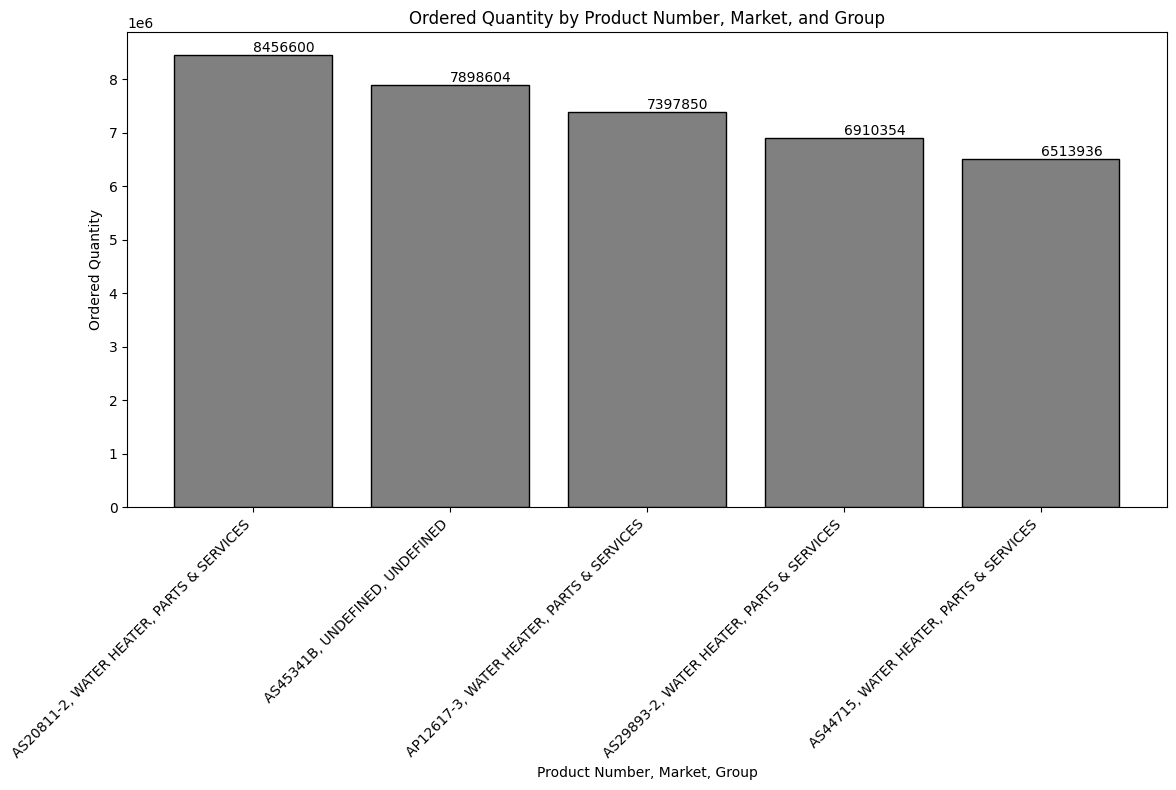

In [27]:

from matplotlib import pyplot as plt
import numpy as np


ordered_quantity = top_5_details['Ordered Quantity']
product_numbers = top_5_details['Product Number']
product_market = top_5_details['Product Market']
product_group = top_5_details['Product Group']


combined_categories = [f"{p}, {m}, {g}" for p, m, g in zip(product_numbers, product_market, product_group)]

x = np.arange(len(combined_categories))
fig, ax = plt.subplots(figsize=(12, 8))
bars = ax.bar(x, ordered_quantity, color='gray', edgecolor='black')


ax.set_xlabel('Product Number, Market, Group')
ax.set_ylabel('Ordered Quantity')
ax.set_title('Ordered Quantity by Product Number, Market, and Group')
ax.set_xticks(x)
ax.set_xticklabels(combined_categories, rotation=45, ha='right')


for bar in bars:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom') 

plt.tight_layout()
plt.show()

## Figuring out the flow of data; Is it a **Trendy or a Seasonal** Data?

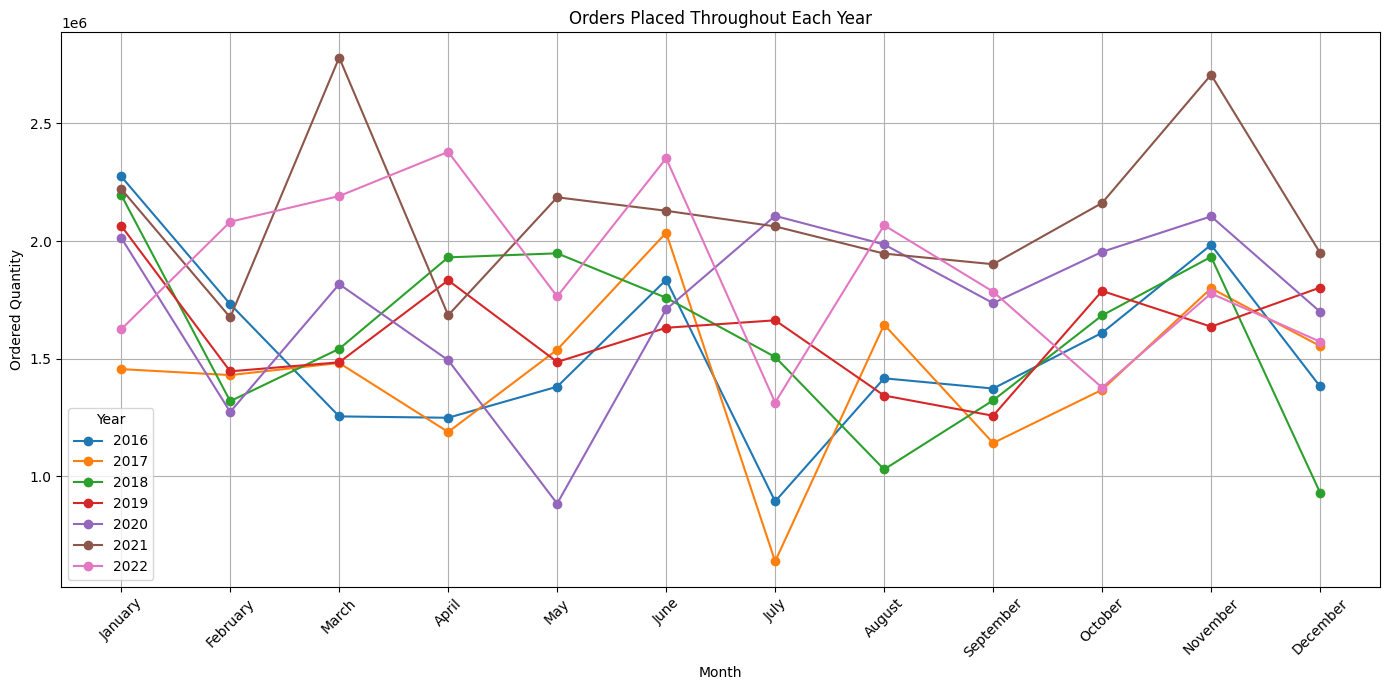

In [35]:
df = pd.DataFrame(data_2016_2022)


# Group by Year and Month Name, then sum Ordered Quantity
grouped = df.groupby(['Year', 'Month Name'])['Ordered Quantity'].sum().unstack(level=0)

# Sorting the index to ensure months are in order
grouped = grouped.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Plotting
plt.figure(figsize=(14, 7))
for year in grouped.columns:
    plt.plot(grouped.index, grouped[year], marker='o', label=str(year))

plt.xlabel('Month')
plt.ylabel('Ordered Quantity')
plt.title('Orders Placed Throughout Each Year')
plt.legend(title='Year')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()

to check:

In [42]:
jan = data_2016_2022[(data_2016_2022['Year']==2016) & (data_2016_2022['Month Name'] == 'January') & (data_2016_2022['Ordered Quantity'])]
jan_orders = jan['Ordered Quantity'].sum()
feb = data_2016_2022[(data_2016_2022['Year']==2016) & (data_2016_2022['Month Name'] == 'February') & (data_2016_2022['Ordered Quantity'])]
feb_orders = feb['Ordered Quantity'].sum()
difference = jan_orders-feb_orders
print(f"{jan_orders} , {feb_orders} , {difference}" )

2274592.0 , 1731900.0 , 542692.0


In [43]:
import plotly.graph_objects as go

df = pd.DataFrame(data_2016_2022)

# Group by Year and Month Name, then sum Ordered Quantity
grouped = df.groupby(['Year', 'Month Name'])['Ordered Quantity'].sum().unstack(level=0)

# Sorting the index to ensure months are in order
grouped = grouped.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Plotting with Plotly
fig = go.Figure()

for year in grouped.columns:
    fig.add_trace(go.Scatter(x=grouped.index, y=grouped[year], mode='lines+markers', name=str(year)))

fig.update_layout(
    title='Orders Placed Throughout Each Year',
    xaxis_title='Month',
    yaxis_title='Ordered Quantity',
    xaxis=dict(tickmode='array', tickvals=list(grouped.index), ticktext=grouped.index),
    legend_title='Year'
)

fig.show()

In [106]:

df = pd.DataFrame(data_2016_2022)

# Group by Year and Week Number, then sum Ordered Quantity
grouped = df.groupby([ 'Week Number','Year'])['Ordered Quantity'].sum().unstack(level=1)
# week = df.groupby(['Week Number'])['Ordered Quantity'].sum().unstack()

# Plotting with Plotly
fig = go.Figure()

for year in grouped.columns:
    fig.add_trace(go.Scatter(x=grouped.index, y=grouped[year], mode='lines+markers', name=str(year)))

fig.update_layout(
    title='Orders Placed Throughout Each Year',
    xaxis_title='Week Number',
    yaxis_title='Ordered Quantity',
    xaxis=dict(tickmode='linear', tick0=1, dtick=1),  # Display ticks for each week number
    yaxis=dict(tickformat=','),)

fig.show()

In [100]:
wo = data_2016_2022[(data_2016_2022['Year']==2016)  & (data_2016_2022['Ordered Quantity']) & (data_2016_2022['Week Number'] == 1)]
wo = wo['Ordered Quantity'].sum()
wo
# two = data_2016_2022[(data_2016_2022['Year']==2016) & (data_2016_2022['Week Number'] == '2') & (data_2016_2022['Ordered Quantity'])]
# two_orders = feb['Ordered Quantity'].sum()
# difference = one_orders-two_orders
# print(f"{one_orders} , {two_orders} , {difference}" )

np.float64(4165.0)